In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# Penetracion Internet Fijo

KPI1 -> Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

In [2]:
pe_in = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/275028/data.csv')

In [3]:
pe_in.sample(5)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
42,2022,2,San Luis,"81,76"
212,2020,3,Santa Fe,"72,12"
348,2019,1,Mendoza,"37,66"
376,2018,4,Salta,"39,8"
454,2018,1,Tierra Del Fuego,"65,2"


In [4]:
pe_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
pe_in_copy = pe_in.copy()

In [6]:
pe_in_copy['Accesos por cada 100 hogares'] = pe_in_copy['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
pe_in_copy['Accesos por cada 100 hogares']

0       78.11
1      122.28
2       65.33
3       43.86
4       84.38
        ...  
835     28.94
836     47.85
837     16.31
838     63.97
839     33.42
Name: Accesos por cada 100 hogares, Length: 840, dtype: float64

In [7]:
pe_in_copy.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,840.000000,840.000000,840.000000
mean,2017.885714,2.457143,49.065750
std,2.528745,1.105009,23.151885
min,2014.000000,1.000000,9.350000
25%,2016.000000,1.000000,32.107500
50%,2018.000000,2.000000,45.900000
75%,2020.000000,3.000000,61.865000
max,2022.000000,4.000000,124.060000


In [8]:
provincia = 'Santiago del estero'
year = 2022

pe_in_copy = pe_in_copy[pe_in_copy.Provincia.str.lower() == provincia.lower()]
pe_in_copy = pe_in_copy[pe_in_copy['Año'] == year]
pe_in_copy.sort_values('Trimestre', ascending=True, inplace=True)
pe_in_copy

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
69,2022,1,Santiago Del Estero,47.17
45,2022,2,Santiago Del Estero,47.70
21,2022,3,Santiago Del Estero,47.98


Porcentajes de aumento entre cuartiles: [1.1235955056179798, 0.5870020964360462]
Promedio de aumento: 0.8552988010270131
Se requieren 3 nuevas conexiones para lograr un aumento de 2% el siguiente trimestre


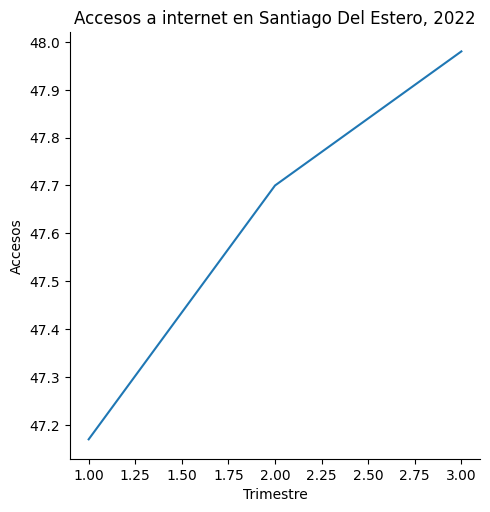

In [9]:
sns.relplot(data = pe_in_copy,
           x = pe_in_copy['Trimestre'],
           y = pe_in_copy['Accesos por cada 100 hogares'],
           kind = 'line',	aspect= 1).set(title = f'Accesos a internet en {provincia.title()}, {year}', ylabel = 'Accesos')

valores = pe_in_copy['Accesos por cada 100 hogares'].values

aumento_accesos = []

for i in range(len(valores) - 1):
    porcentaje = ((valores[i+1] - valores[i]) / valores[i]) * 100
    aumento_accesos.append(porcentaje)
    
promedio = sum(aumento_accesos) / len(aumento_accesos)
KPI1 = 2
meta1 = (sum(valores) * KPI1) / 100

print(f'Porcentajes de aumento entre cuartiles: {aumento_accesos}')
print(f'Promedio de aumento: {promedio}')
print(f'Se requieren {round(meta1)} nuevas conexiones para lograr un aumento de {KPI1}% el siguiente trimestre')

# ANALIZANDO ACCESOS A INTERNET POR  TECNOLOGIA Y LOCALIDAD

KPI2 -> Aumentar la tecnologia wireless en las regiones montañosas en un 10%

El criterio usado para definir a una region como _montañosa_ se basa en que la superficie de las montañas debe superar el 40% de la superficie total de la provincia.

Las provincias seleccionadas fueron:

- Catamarca

- Jujuy

- Chubut

- La rioja

- Mendoza

- Neuquen

- Salta

- San juan

- Tucuman

Informacion extraida del articulo [_Areas de montaña de la republica de Argentina_](https://www.argentina.gob.ar/sites/default/files/montanas_publicacion_completo_7_05_2019.pdf), publicado por: Instituto Geografico Nacional Republica de Argentina.

In [10]:
tec_lo = pd.read_csv('https://datosabiertos.enacom.gob.ar/rest/datastreams/279175/data.csv')

In [11]:
regiones = ['Catamarca', 'Jujuy', 'Chubut', 'La rioja', 'Mendoza', 'Neuquén', 'Salta', 'San juan', 'Tucumán']

### analizar composicion

In [12]:
tec_lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [13]:
tec_lo.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
837,CHACO,Libertador General San Martín,Pampa del Indio,22084060,- 0,- 0,- 0,25,- 0,2,- 0,757,784,NaN
126,BUENOS AIRES,Carlos Casares,Bellocq,6147010,- 0,- 0,1,- 0,- 0,- 0,- 0,- 0,1,NaN
2262,SALTA,Anta,Coronel Mollinedo,66007040,- 0,- 0,- 0,- 0,- 0,1,- 0,2,3,NaN
2495,SAN LUIS,Coronel Pringles,La Florida,74021050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,87,87,NaN
2824,SANTA FE,San Cristóbal,Colonia Bossi,82091080,56,- 0,- 0,118,- 0,- 0,- 0,3,177,NaN


### Analizar datos

In [14]:
tec_lo_copy = tec_lo.copy()

In [15]:
tec_lo_copy.sample(5)

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
2550,SAN LUIS,Libertador Grl. San Martín,La Ramada,74063020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,2.144,2.144,NaN
810,CHACO,Fray Justo Santa María De Oro,Chorotis,22043010,- 0,- 0,- 0,- 0,25,- 0,- 0,- 0,25,NaN
2569,SANTA CRUZ,Deseado,Tellier,78014090,- 0,- 0,- 0,- 0,- 0,1,- 0,- 0,1,NaN
2865,SANTA FE,San Jerónimo,Maciel,82105190,583,782,- 0,- 0,136,- 0,- 0,1,1.502,NaN
468,BUENOS AIRES,Monte,San Miguel del Monte (Est. Monte),6547020,487,1.919,3,3.775,- 0,- 0,- 0,344,6.528,NaN


In [16]:
tec_lo_copy['WIRELESS'].replace('- 0', '0', inplace=True)
tec_lo_copy['WIRELESS'] = tec_lo_copy['WIRELESS'].astype(float)
tec_lo_copy = tec_lo_copy[tec_lo_copy.Provincia.str.capitalize().isin(regiones) == True]
tec_lo_copy

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
717,CATAMARCA,Ambato,El Bolsón,10007030,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
718,CATAMARCA,Ambato,El Rodeo,10007040,- 0,- 0,- 0,- 0,- 0,1,- 0,152.0,153,NaN
719,CATAMARCA,Ambato,La Puerta,10007060,- 0,- 0,- 0,- 0,- 0,5,- 0,0.0,5,NaN
720,CATAMARCA,Ambato,Las Chacritas,10007070,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
721,CATAMARCA,Ambato,Los Varela,10007110,- 0,- 0,- 0,- 0,- 0,1,- 0,0.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2459,SAN JUAN,Ullum,Villa Ibáñez,70112010,- 0,- 0,1,- 0,- 0,- 0,- 0,402.0,403,NaN
2460,SAN JUAN,Valle Fértil,Astica,70119010,- 0,- 0,- 0,- 0,- 0,- 0,- 0,30.0,30,NaN
2461,SAN JUAN,Valle Fértil,OTROS,Sin Datos,- 0,- 0,- 0,- 0,190,- 0,- 0,0.0,190,NaN
2462,SAN JUAN,Valle Fértil,Villa San Agustín,70119060,- 0,- 0,- 0,1,- 0,4,- 0,260.0,265,NaN


In [17]:
wir_pro = tec_lo_copy.groupby(['Provincia']).agg({'WIRELESS':['sum']})
# wir_pro.reset_index().rename(columns={'index':'ID'})
# wir_pro.reset_index(inplace=True)
wir_pro

,WIRELESS
,sum
Provincia,
CATAMARCA,1329.000
CHUBUT,4641.168
JUJUY,4033.000
LA RIOJA,5173.223
MENDOZA,15206.431
SALTA,4374.713
SAN JUAN,6548.327


[Text(0.5, 0, 'Conexiones Wireless'), Text(0, 0.5, 'Provincia')]

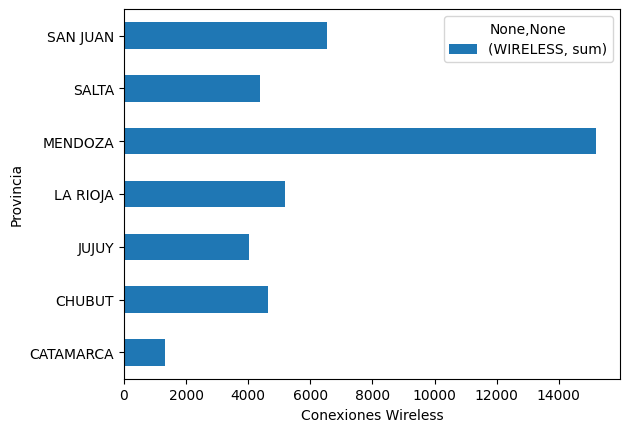

In [18]:
plot = wir_pro.plot(kind='barh')
plot.set(xlabel = 'Conexiones Wireless',
         ylabel = 'Provincia')

sum -> 100%
x   -> 110%

In [32]:
sum(wir_pro.WIRELESS['sum'])

valores = wir_pro.WIRELESS.values
KPI2 = 10
meta2 = round((sum(wir_pro.WIRELESS['sum']) * (KPI2 / 100))) 
print(f'Para lograr un aumento del {KPI2}% en las conexiones de tipo Wireless en las regiones montañosas de Argentina, se deben lograr una cantidad de {meta2} nuevos accesos.')

Para lograr un aumento del 10% en las conexiones de tipo Wireless en las regiones montañosas de Argentina, se deben lograr una cantidad de 4131 nuevos accesos.
